 --- 
# UCI - Default from Credit Card Clients
---

# Dataset presentation

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

It can be found here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


In [7]:
    # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# Any results you write to the current directory are saved as output.

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\nfor filename in filenames:\n    print(os.path.join(dirname, filename))\n"

In [8]:
root = Path('.')
df = pd.read_csv(root / 'UCI_Credit_Card.csv')

# Useful imports

## Packages

In [9]:
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
pd.set_option('display.max_columns', 999)

In [11]:
sns.set_style("darkgrid")

## Data Preparation imports

In [12]:
from sklearn.preprocessing import StandardScaler

## Model imports

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Metrics imports

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Initial Data Exploration

In [15]:
df.shape

(30000, 25)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [17]:
df.head(20)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    1    20000.0    2          2         1   24      2      2     -1     -1   
1    2   120000.0    2          2         2   26     -1      2      0      0   
2    3    90000.0    2          2         2   34      0      0      0      0   
3    4    50000.0    2          2         1   37      0      0      0      0   
4    5    50000.0    1          2         1   57     -1      0     -1      0   
5    6    50000.0    1          1         2   37      0      0      0      0   
6    7   500000.0    1          1         2   29      0      0      0      0   
7    8   100000.0    2          2         2   23      0     -1     -1      0   
8    9   140000.0    2          3         1   28      0      0      2      0   
9   10    20000.0    1          3         2   35     -2     -2     -2     -2   
10  11   200000.0    2          3         2   34      0      0      2      0   
11  12   260000.0    2          1         2   51     -1     -1     -1     -1   
12  13   630000.0    2          2         2   41     -1      0     -1     -1   
13  14    70000.0    1          2         2   30      1      2      2      0   
14  15   250000.0    1          1         2   29      0      0      0      0   
15  16    50000.0    2          3         3   23      1      2      0      0   
16  17    20000.0    1          1         2   24      0      0      2      2   
17  18   320000.0    1          1         1   49      0      0      0     -1   
18  19   360000.0    2          1         1   49      1     -2     -2     -2   
19  20   180000.0    2          1         2   29      1     -2     -2     -2   

    PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1       0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2       0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3       0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4       0      0     8617.0     5670.0    35835.0    20940.0    19146.0   
5       0      0    64400.0    57069.0    57608.0    19394.0    19619.0   
6       0      0   367965.0   412023.0   445007.0   542653.0   483003.0   
7       0     -1    11876.0      380.0      601.0      221.0     -159.0   
8       0      0    11285.0    14096.0    12108.0    12211.0    11793.0   
9      -1     -1        0.0        0.0        0.0        0.0    13007.0   
10      0     -1    11073.0     9787.0     5535.0     2513.0     1828.0   
11     -1      2    12261.0    21670.0     9966.0     8517.0    22287.0   
12     -1     -1    12137.0     6500.0     6500.0     6500.0     6500.0   
13      0      2    65802.0    67369.0    65701.0    66782.0    36137.0   
14      0      0    70887.0    67060.0    63561.0    59696.0    56875.0   
15      0      0    50614.0    29173.0    28116.0    28771.0    29531.0   
16      2      2    15376.0    18010.0    17428.0    18338.0    17905.0   
17     -1     -1   253286.0   246536.0   194663.0    70074.0     5856.0   
18     -2     -2        0.0        0.0        0.0        0.0        0.0   
19     -2     -2        0.0        0.0        0.0        0.0        0.0   

    BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0         0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1      3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2     15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3     29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4     19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   
5     20024.0    2500.0    1815.0     657.0    1000.0    1000.0     800.0   
6    473944.0   55000.0   40000.0   38000.0   20239.0   13750.0   13770.0   
7       567.0     380.0     601.0       0.0     581.0    1687.0    1542.0   
8      3719.0    3329.0       0.0     432.0    1000.0 

## Statistical description

In [18]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

## Missing values

Any missing values?

In [19]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No, we're good!

## Copy without ID

In [20]:
df_original = df.copy()

In [21]:
df = df.drop(columns='ID')

In [22]:
list(df.columns)[:5]

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

# Data cleaning

## Renaming columns

### Setting same template for all column names

In [23]:
df = df.rename(columns = {'PAY_0':'PAY_1', 
                          'default.payment.next.month': 'default',
                         'SEX':'GENDER'})

Let's capitalize all column names

Let's extract column names first

### Lowercase column names

In [24]:
colonnes = list(df.columns)

In [25]:
renaming_dict = {}
new_colonnes = []
for colonne in colonnes:
    new_colonne = colonne.lower()
    renaming_dict[colonne] = new_colonne
    new_colonnes.append(new_colonne)

In [26]:
new_colonnes[:5]

['limit_bal', 'gender', 'education', 'marriage', 'age']

In [27]:
df = df.rename(columns=renaming_dict)

### Defining our column names list

In [28]:
colonnes = new_colonnes.copy()

In [29]:
colonnes[:5]

['limit_bal', 'gender', 'education', 'marriage', 'age']

In [30]:
df.head()

limit_bal  gender  education  marriage  age  pay_1  pay_2  pay_3  pay_4  \
0    20000.0       2          2         1   24      2      2     -1     -1   
1   120000.0       2          2         2   26     -1      2      0      0   
2    90000.0       2          2         2   34      0      0      0      0   
3    50000.0       2          2         1   37      0      0      0      0   
4    50000.0       1          2         1   57     -1      0     -1      0   

   pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default  
0        1  
1        1  
2        0  
3        0  
4        0

## Cleaning the pay_n data

Let's change the pay_n data, so that it is either 0 or 1:
* 0: there was no default
* 1: Default !

We could also try to predict our outcomes only by using the 1 or 2 previous months, so that we can have much more validation data !

This way, we could predict pay_1 using pay_2 and pay_3

In [31]:
df.pay_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pay_1, dtype: int64

In [32]:
pay_columns = ['pay_'+str(i) for i in range(1,7)]
pay_columns

['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [33]:
for pay_col in pay_columns:
    df.loc[df[pay_col] >0, pay_col] = 1
    df.loc[df[pay_col] <= 0, pay_col] = 0

In [34]:
df.pay_1.value_counts()

0    23182
1     6818
Name: pay_1, dtype: int64

# Back to Data Exploration

## Data repartition among the 2 classes

In [35]:
df.groupby('default').size()

default
0    23364
1     6636
dtype: int64

In [36]:
print("Default percentage: {} %".format(df[df['default']==1].shape[0] / df.shape[0] * 100) )

Default percentage: 22.12 %


## Our categorical variables

In [37]:
df.describe()

limit_bal        gender     education      marriage           age  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              pay_1         pay_2         pay_3         pay_4         pay_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.227267      0.147933      0.140433      0.117000      0.098933   
std        0.419073      0.355040      0.347442      0.321426      0.298577   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              pay_6      bill_amt1      bill_amt2     bill_amt3  \
count  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean       0.102633   51223.330900   49179.075167  4.701315e+04   
std        0.303484   73635.860576   71173.768783  6.934939e+04   
min        0.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%        0.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000   67091.000000   64006.250000  6.016475e+04   
max        1.000000  964511.000000  983931.000000  1.664089e+06   

           bill_amt4      bill_amt5      bill_amt6       pay_amt1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           pay_amt2      pay_amt3       pay_amt4       pay_amt5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            pay_amt6       default  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000

In [38]:
df.sample(20)

limit_bal  gender  education  marriage  age  pay_1  pay_2  pay_3  \
8816    200000.0       2          2         1   40      0      0      0   
29156    80000.0       2          3         1   54      0      0      0   
26157   220000.0       2          2         2   29      0      0      0   
21802    80000.0       2          3         1   24      0      0      0   
23155    50000.0       2          2         2   35      1      1      1   
22610   200000.0       2          3         1   30      1      1      1   
145      50000.0       1          1         2   28      0      0      0   
21045    80000.0       1          3         1   34      0      0      0   
376      30000.0       1          2         1   43      1      1      0   
13987    50000.0       2          3         2   63      1      1      1   
9092     50000.0       1          2         2   23      0      0      0   
13349   390000.0       1          1         1   38      0      0      0   
22348   280000.0       2          1         2   28      0      0      0   
9697    100000.0       2          2         1   39      0      0      0   
838     420000.0       1          2         1   34      0      0      0   
7515    340000.0       2          2         2   38      0      0      0   
23981    20000.0       1          3         2   24      0      1      0   
2889     50000.0       1          3         2   46      0      0      0   
8692     50000.0       2          2         1   50      0      0      0   
22988   500000.0       2          1         2   42      0      0      0   

       pay_4  pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  \
8816       0      0      0     7236.0    12958.0        0.0     2797.0   
29156      0      0      0    68519.0    69493.0    70656.0    72290.0   
26157      0      0      0   131598.0   132727.0   135509.0   139774.0   
21802      1      0      0      754.0      -69.0     3330.0     2699.0   
23155      1      0      0    18544.0    17954.0    21678.0    21032.0   
22610      1      1      1   140327.0   143137.0   145374.0   147273.0   
145        0      0      1     4999.0     5913.0     7315.0     9195.0   
21045      0      0      0     5173.0    10809.0     8673.0    11590.0   
376        0      0      1    20518.0    19901.0    20905.0    21509.0   
13987      1      0      0    51432.0    50316.0    50866.0    48194.0   
9092       0      0      0    30101.0        0.0      780.0        0.0   
13349      0      0      0    30642.0    31843.0    32860.0    33511.0   
22348      0      0      0    40683.0     1888.0     1592.0     1312.0   
9697       0      0      0    97040.0    65668.0    66046.0    66779.0   
838        0      0      0    88948.0    79783.0    80575.0    92982.0   
7515       0      0      0        0.0      780.0        0.0        0.0   
23981      0      0      0      546.0       48.0      498.0      449.0   
2889       0      0      0     5942.0     5444.0     2464.0     2521.0   
8692       0      0      0    50658.0    48999.0    49388.0    48853.0   
22988      0      0      0   237066.0   171440.0   177859.0   159518.0   

       bill_amt5  bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  \
8816      5982.0     8339.0   13003.0       0.0    2797.0    5982.0    8339.0   
29156      390.0      390.0    2500.0    2671.0    3308.0     390.0     390.0   
26157   141099.0   155763.0    4800.0    4920.0    6520.0    5120.0   17001.0   
21802     1853.0      184.0       0.0    3399.0       0.0    1853.0     184.0   
23155    21465.0    24103.0       0.0    4351.0       0.0     784.0    3000.0   
22610   149244.0   151973.0    6600.0    6000.0    5860.0    6000.0    5000.0   
145      10624.0    10138.0    1000.0    1500.0    2000.0    1583.0    1100.0   
21045     5973.0     5878.0   10826.0    3683.0    5034.0    5981.0    2895.0   
376      25183.0    24242.0       0.0    1342.0     946.0    4200.0       0.0   
13987    47233.0    50224.0       0.0    3600.0       0.0    3000.

Our Categorical data are 'gender', 'education', 'marriage'

In [39]:
df.gender.value_counts()

2    18112
1    11888
Name: gender, dtype: int64

In [40]:
df.education.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

### On plot tout ça

#### Education

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [41]:
df.default.describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64

In [42]:
df[df['default']==3]

Empty DataFrame
Columns: [limit_bal, gender, education, marriage, age, pay_1, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt1, bill_amt2, bill_amt3, bill_amt4, bill_amt5, bill_amt6, pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6, default]
Index: []

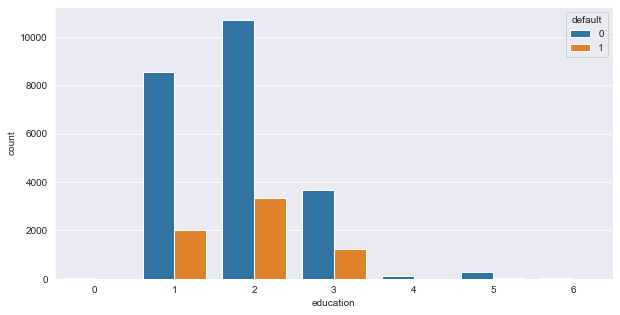

In [43]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="education", hue="default", data=df)

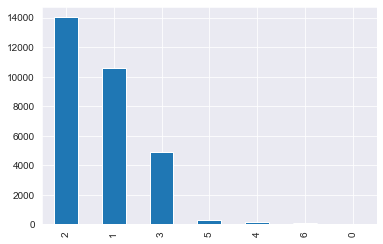

In [44]:
df.education.value_counts().plot(kind='bar')

Bizarre...
On regroupe tout ça (les catégories autres: 0,4,5,6) dans 4

In [45]:
df[df['education'].isin([0,4,5,6])][:5]

limit_bal  gender  education  marriage  age  pay_1  pay_2  pay_3  pay_4  \
47    150000.0       2          5         2   46      0      0      0      0   
69     20000.0       1          5         2   22      1      0      0      0   
358   110000.0       2          4         2   24      0      0      0      0   
385   410000.0       2          5         1   42      0      0      0      0   
448   200000.0       1          4         1   42      0      0      0      0   

     pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
47       0      0     4463.0     3034.0     1170.0     1170.0        0.0   
69       0      0    18565.0    17204.0    17285.0    18085.0    11205.0   
358      0      0    83755.0    77431.0    79044.0    80631.0    82333.0   
385      0      0   338106.0   342904.0   344464.0   240865.0   234939.0   
448      0      0    38564.0    38246.0    32253.0    30384.0    30900.0   

     bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
47         0.0    1013.0    1170.0       0.0       0.0       0.0       0.0   
69      5982.0       0.0    1200.0    1000.0     500.0    1000.0       0.0   
358    84462.0    3000.0    2900.0    2900.0    3000.0    3500.0    4000.0   
385   240176.0   15000.0   14000.0    9000.0    8500.0    9000.0    8300.0   
448        0.0    5000.0    1485.0    1956.0    1500.0       0.0    2102.0   

     default  
47         1  
69         0  
358        0  
385        0  
448        0

In [46]:
df.loc[df['education'].isin([0,4,5,6]), 'education'] = 4

In [47]:
df['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

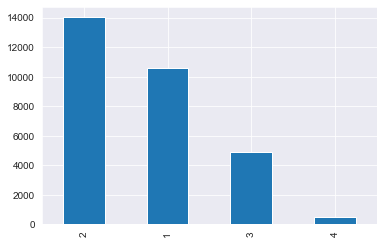

In [48]:
df['education'].value_counts().plot(kind='bar')

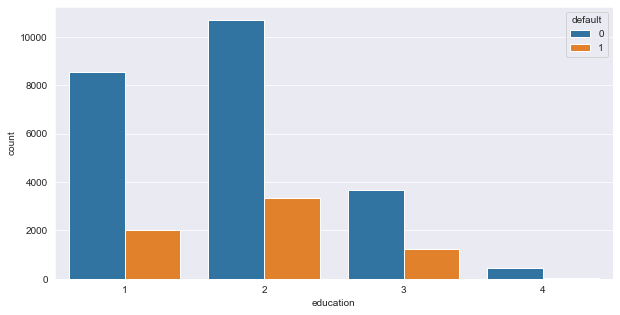

In [49]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="education", hue="default", data=df)

#### Marriage
 MARRIAGE: Marital status (1=married, 2=single, 3=others)

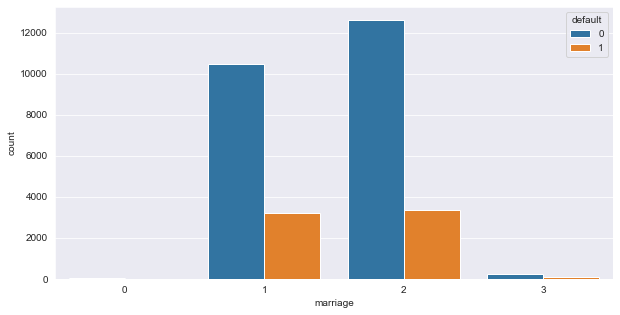

In [50]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="marriage", hue="default", data=df)

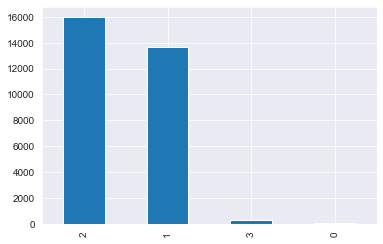

In [51]:
df.marriage.value_counts().plot(kind='bar')

Idem pour 'marriage': (0,3) -> 3

In [52]:
df.marriage.value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

In [53]:
df.loc[df['marriage'].isin([0,3,4]), 'marriage'] = 3
df['marriage'].value_counts()

2    15964
1    13659
3      377
Name: marriage, dtype: int64

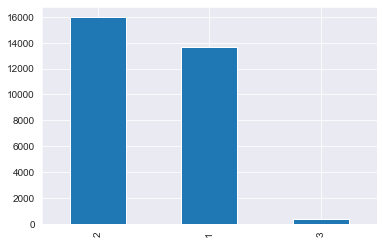

In [54]:
df.marriage.value_counts().plot(kind='bar')

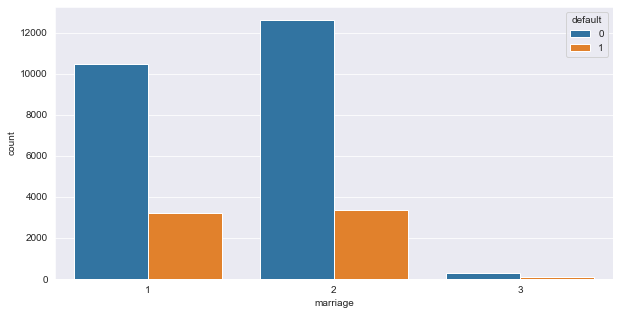

In [55]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="marriage", hue="default", data=df)

## Our other variables

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


[]

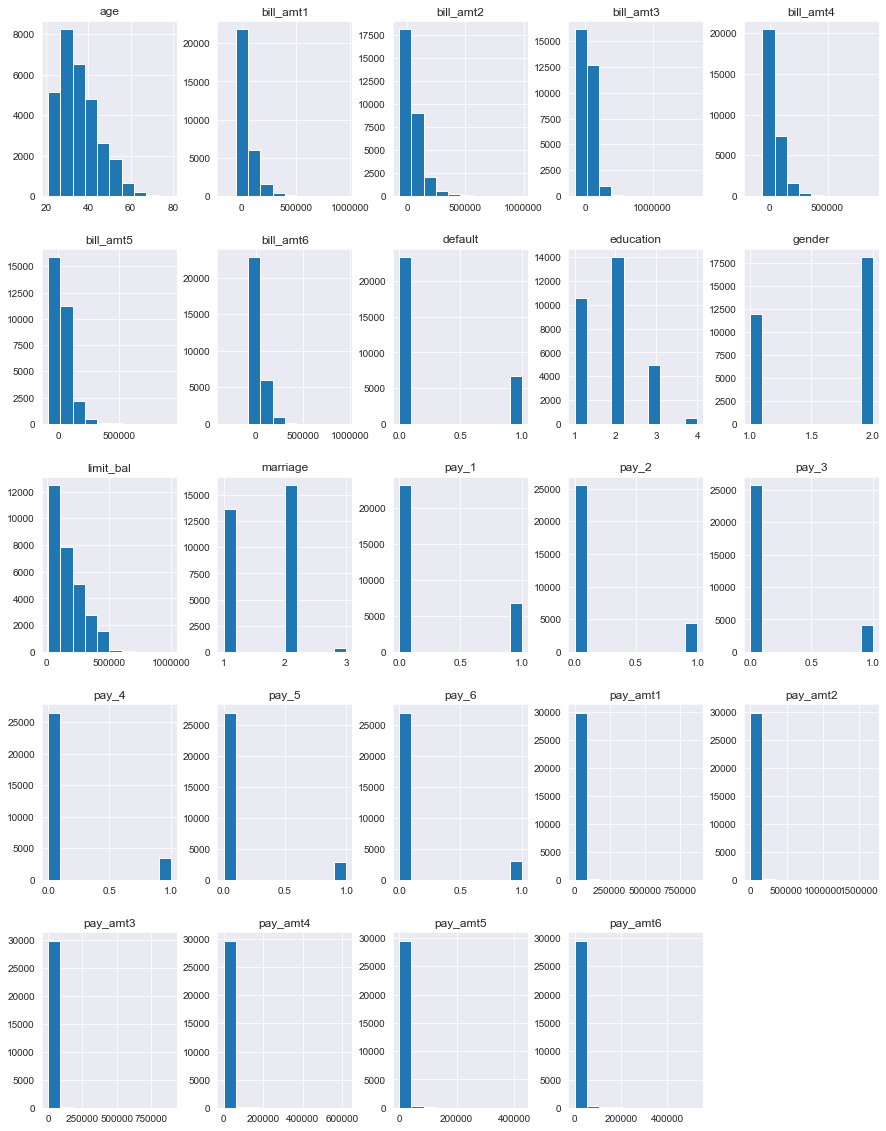

In [56]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.plot()

In [57]:
df

limit_bal  gender  education  marriage  age  pay_1  pay_2  pay_3  \
0        20000.0       2          2         1   24      1      1      0   
1       120000.0       2          2         2   26      0      1      0   
2        90000.0       2          2         2   34      0      0      0   
3        50000.0       2          2         1   37      0      0      0   
4        50000.0       1          2         1   57      0      0      0   
...          ...     ...        ...       ...  ...    ...    ...    ...   
29995   220000.0       1          3         1   39      0      0      0   
29996   150000.0       1          3         2   43      0      0      0   
29997    30000.0       1          2         2   37      1      1      1   
29998    80000.0       1          3         1   41      1      0      0   
29999    50000.0       1          2         1   46      0      0      0   

       pay_4  pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  \
0          0      0      0     3913.0     3102.0      689.0        0.0   
1          0      0      1     2682.0     1725.0     2682.0     3272.0   
2          0      0      0    29239.0    14027.0    13559.0    14331.0   
3          0      0      0    46990.0    48233.0    49291.0    28314.0   
4          0      0      0     8617.0     5670.0    35835.0    20940.0   
...      ...    ...    ...        ...        ...        ...        ...   
29995      0      0      0   188948.0   192815.0   208365.0    88004.0   
29996      0      0      0     1683.0     1828.0     3502.0     8979.0   
29997      0      0      0     3565.0     3356.0     2758.0    20878.0   
29998      0      0      0    -1645.0    78379.0    76304.0    52774.0   
29999      0      0      0    47929.0    48905.0    49764.0    36535.0   

       bill_amt5  bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  \
0            0.0        0.0       0.0     689.0       0.0       0.0       0.0   
1         3455.0     3261.0       0.0    1000.0    1000.0    1000.0       0.0   
2        14948.0    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0   
3        28959.0    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0   
4        19146.0    19131.0    2000.0   36681.0   10000.0    9000.0     689.0   
...          ...        ...       ...       ...       ...       ...       ...   
29995    31237.0    15980.0    8500.0   20000.0    5003.0    3047.0    5000.0   
29996     5190.0        0.0    1837.0    3526.0    8998.0     129.0       0.0   
29997    20582.0    19357.0       0.0       0.0   22000.0    4200.0    2000.0   
29998    11855.0    48944.0   85900.0    3409.0    1178.0    1926.0   52964.0   
29999    32428.0    15313.0    2078.0    1800.0    1430.0    1000.0    1000.0   

       pay_amt6  default  
0           0.0        1  
1        2000.0        1  
2        5000.0        0  
3        1000.0        0  
4         679.0        0  
...         ...      ...  
29995    1000.0        0  
29996       0.0        0  
29997    3100.0        1  
29998    1804.0        1  
29999    1000.0        1  

[30000 rows x 24 columns]

### pay_amt variables

In [58]:
df['pay_amt1'].describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: pay_amt1, dtype: float64

Weird how bit the payment amount range is !

Let's have a closer look at them :D

In [59]:
df[df['pay_amt1']>300000]

limit_bal  gender  education  marriage  age  pay_1  pay_2  pay_3  \
2687    500000.0       2          1         1   44      0      0      0   
5687    480000.0       2          1         1   39      0      0      0   
8500    400000.0       2          1         1   28      0      0      1   
12330   300000.0       1          2         1   37      1      0      1   
25431   170000.0       2          2         2   28      0      0      0   
28003   510000.0       2          1         2   30      0      0      0   
28716   340000.0       2          1         3   42      0      0      0   
29820   400000.0       1          2         2   37      1      0      0   
29867   340000.0       1          1         2   29      0      0      0   
29963   610000.0       1          1         2   31      0      0      1   

       pay_4  pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  \
2687       0      0      0    71921.0   367979.0   294969.0   189612.0   
5687       0      0      0   106660.0   400000.0    66270.0    80274.0   
8500       0      0      0     6500.0   405016.0   391178.0   392932.0   
12330      0      0      0  -165580.0   324392.0   296931.0    30355.0   
25431      0      0      0    30860.0   167941.0   171459.0   173310.0   
28003      0      0      0    71121.0   481382.0   559712.0   163628.0   
28716      0      0      0   139808.0   176743.0    34402.0   205931.0   
29820      0      0      0   396343.0   394858.0   395716.0   385947.0   
29867      0      0      0    44855.0   331641.0   331334.0   286660.0   
29963      0      0      0   348392.0   322228.0   319014.0   347303.0   

       bill_amt5  bill_amt6  pay_amt1   pay_amt2  pay_amt3  pay_amt4  \
2687    128459.0   167105.0  368199.0     6486.0     234.0      90.0   
5687     82160.0   110773.0  302000.0    66270.0   15000.0    3044.0   
8500    394410.0   410127.0  405016.0        0.0   14000.0   13560.0   
12330    26771.0    23737.0  505000.0      331.0    1070.0   17771.0   
25431   240738.0   135722.0  304815.0     8000.0    8127.0    4810.0   
28003   117475.0   116656.0  493358.0  1227082.0  164577.0     510.0   
28716   265431.0   270237.0  873552.0  1215471.0  889043.0  621000.0   
29820   305542.0   271385.0  423903.0    15100.0   14600.0   13000.0   
29867   263505.0   268256.0  300039.0    13214.0   12005.0   13005.0   
29963   248893.0   269528.0  323014.0     1605.0  349395.0  250144.0   

       pay_amt5  pay_amt6  default  
2687   167116.0  372495.0        0  
5687    30042.0   34048.0        0  
8500    28000.0       0.0        0  
12330   18000.0   16079.0        0  
25431    5000.0    5400.0        0  
28003    6239.0    4550.0        0  
28716   20000.0  145000.0        0  
29820    9500.0    9500.0        0  
29867   10011.0   12005.0        0  
29963  271099.0  220076.0        0

WTF

**Pourquoi est-ce qu'il y a des montants négatifs dans bill_amt ???**

In [60]:
df[df['pay_amt2']>300000]

limit_bal  gender  education  marriage  age  pay_1  pay_2  pay_3  \
2592    480000.0       1          1         1   49      1      0      0   
3774    500000.0       2          1         2   32      0      0      0   
5296    500000.0       2          1         1   33      0      0      0   
5400    500000.0       2          2         2   49      0      0      0   
6150    300000.0       2          3         2   39      1      0      0   
6864    500000.0       1          1         2   30      0      0      0   
9044    500000.0       2          1         1   36      0      0      0   
11568   430000.0       1          2         1   46      0      0      0   
11853   360000.0       1          3         1   34      1      1      0   
12829   340000.0       1          2         2   44      0      0      0   
13186   750000.0       2          1         2   28      1      0      0   
13863   520000.0       2          3         1   41      0      0      0   
14513   460000.0       2          1         1   43      0      0      0   
16917   350000.0       1          2         1   51      0      0      0   
19723   500000.0       2          1         1   44      0      0      0   
21250   340000.0       1          2         1   49      0      0      0   
24920   430000.0       1          1         1   39      0      0      0   
25731    80000.0       2          3         1   37      0      0      0   
28003   510000.0       2          1         2   30      0      0      0   
28716   340000.0       2          1         3   42      0      0      0   
28993   480000.0       2          1         1   39      0      0      0   

       pay_4  pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  \
2592       0      0      0     -220.0    38929.0   339176.0    33146.0   
3774       0      0      0   103880.0    39356.0   301441.0    37945.0   
5296       0      0      0      125.0   -18088.0  1664089.0   121757.0   
5400       0      0      0    27891.0     8970.0   385228.0   391047.0   
6150       0      0      0    -3928.0    -5973.0     4735.0     6186.0   
6864       0      0      0   192257.0   201402.0   444462.0   418237.0   
9044       0      0      0    51465.0    24201.0   384973.0   349790.0   
11568      0      0      0    52930.0      960.0   354716.0   361373.0   
11853      0      0      0   277040.0   -22960.0   338600.0    22960.0   
12829      0      0      0   327058.0   335584.0   330510.0   272220.0   
13186      0      0      0     9500.0     9655.0   401003.0   399493.0   
13863      0      0      0     7322.0     2728.0   385425.0   387189.0   
14513      0      0      0   323408.0   261444.0   309622.0   297039.0   
16917      0      0      0   343842.0   107315.0   355925.0   353074.0   
19723      0      0      0   329570.0    71921.0   367979.0   294969.0   
21250      0      0      0     9983.0    43418.0   388126.0   358617.0   
24920      0      0      0    43970.0    46127.0   336073.0   325463.0   
25731      0      0      0    47751.0     -215.0   855086.0      632.0   
28003      0      0      0    71121.0   481382.0   559712.0   163628.0   
28716      0      0      0   139808.0   176743.0    34402.0   205931.0   
28993      0      0      0    98569.0   106660.0   400000.0    66270.0   

       bill_amt5  bill_amt6  pay_amt1   pay_amt2  pay_amt3  pay_amt4  \
2592     37337.0    33777.0   39149.0   344261.0   33312.0   37511.0   
3774    104491.0    35234.0   39560.0   302961.0   38139.0  104673.0   
5296     97115.0   377217.0    4366.0  1684259.0  121831.0   97670.0   
5400         0.0      150.0    8982.0   385228.0    7821.0       0.0   
6150       116.0    14429.0    1720.0   344467.0    6822.0      49.0   
6864    424244.0   383145.0   40000.0   300018.0   15000.0   17000.0   
9044    315125.0    16576.0   24201.0   384986.0    7017.0    6342.0   
11568   368484.0   365148.0     510.0   358689.0   15066.0   14126.0   
11853    22960.0        0.0       0.0   361560.0   22960.0       0.0   
12829  

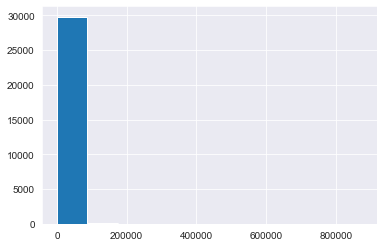

In [61]:
df['pay_amt1'].hist()

Let's have a look at correlations between features now!

## Correlation Study

### Between our features

In [62]:
corr = df.corr()
# corr

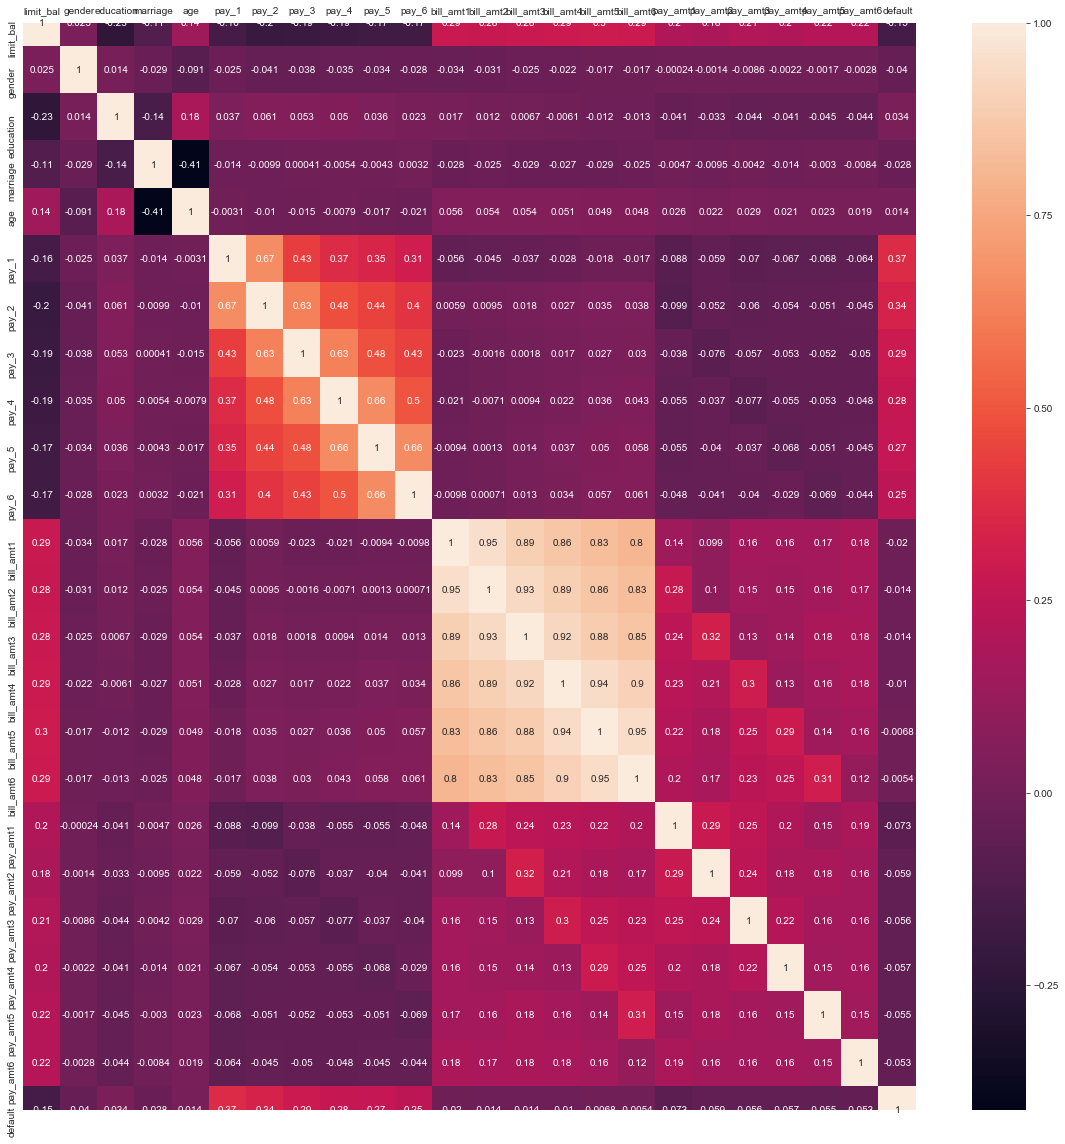

In [63]:
# plot the heatmap and annotation on it
plt.figure(figsize=(20, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

In [64]:
colonnes

['limit_bal',
 'gender',
 'education',
 'marriage',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default']

We can notice that the most correlated features are:
* ( the bill-amt[i], bill_amt[j] ) couples
* ( pay_[n], pay[n+1] ) couples,   
with pay_[n] being 0 if the nth month has been repayed in time, 1 otherwise

Let's try out the Spearman correlation (better at detecting non-parametric correlations)

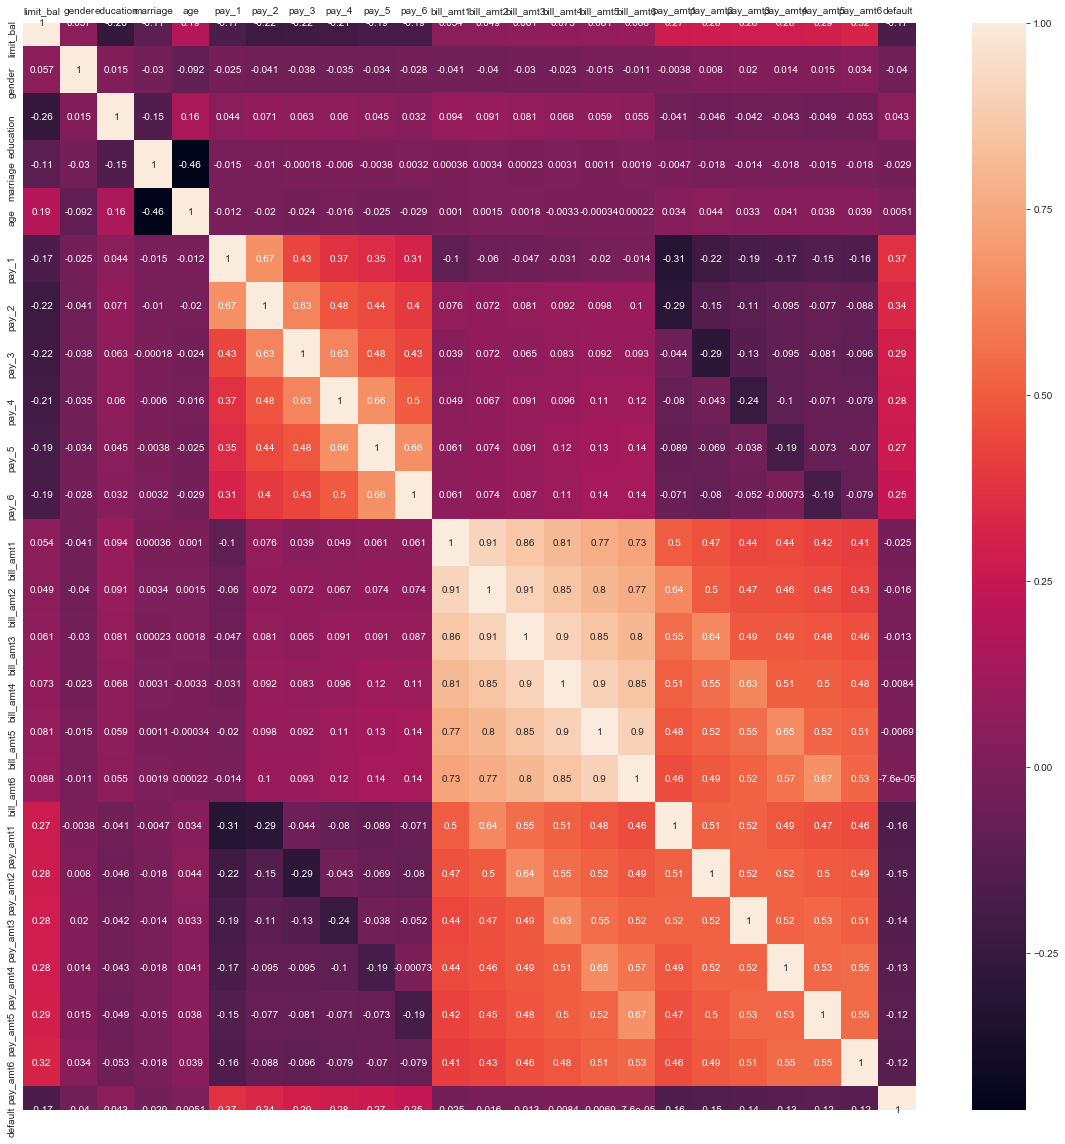

In [65]:
corr_spearman = df.corr(method='spearman')
# plot the heatmap and annotation on it
plt.figure(figsize=(20, 20))
sns.heatmap(corr_spearman, xticklabels=corr_spearman.columns, yticklabels=corr_spearman.columns, annot=True)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

It appears that the results using the Spearman correlations are very similar with the results from the Pearson corelations

#### Scatter Matrix: multivariate plots

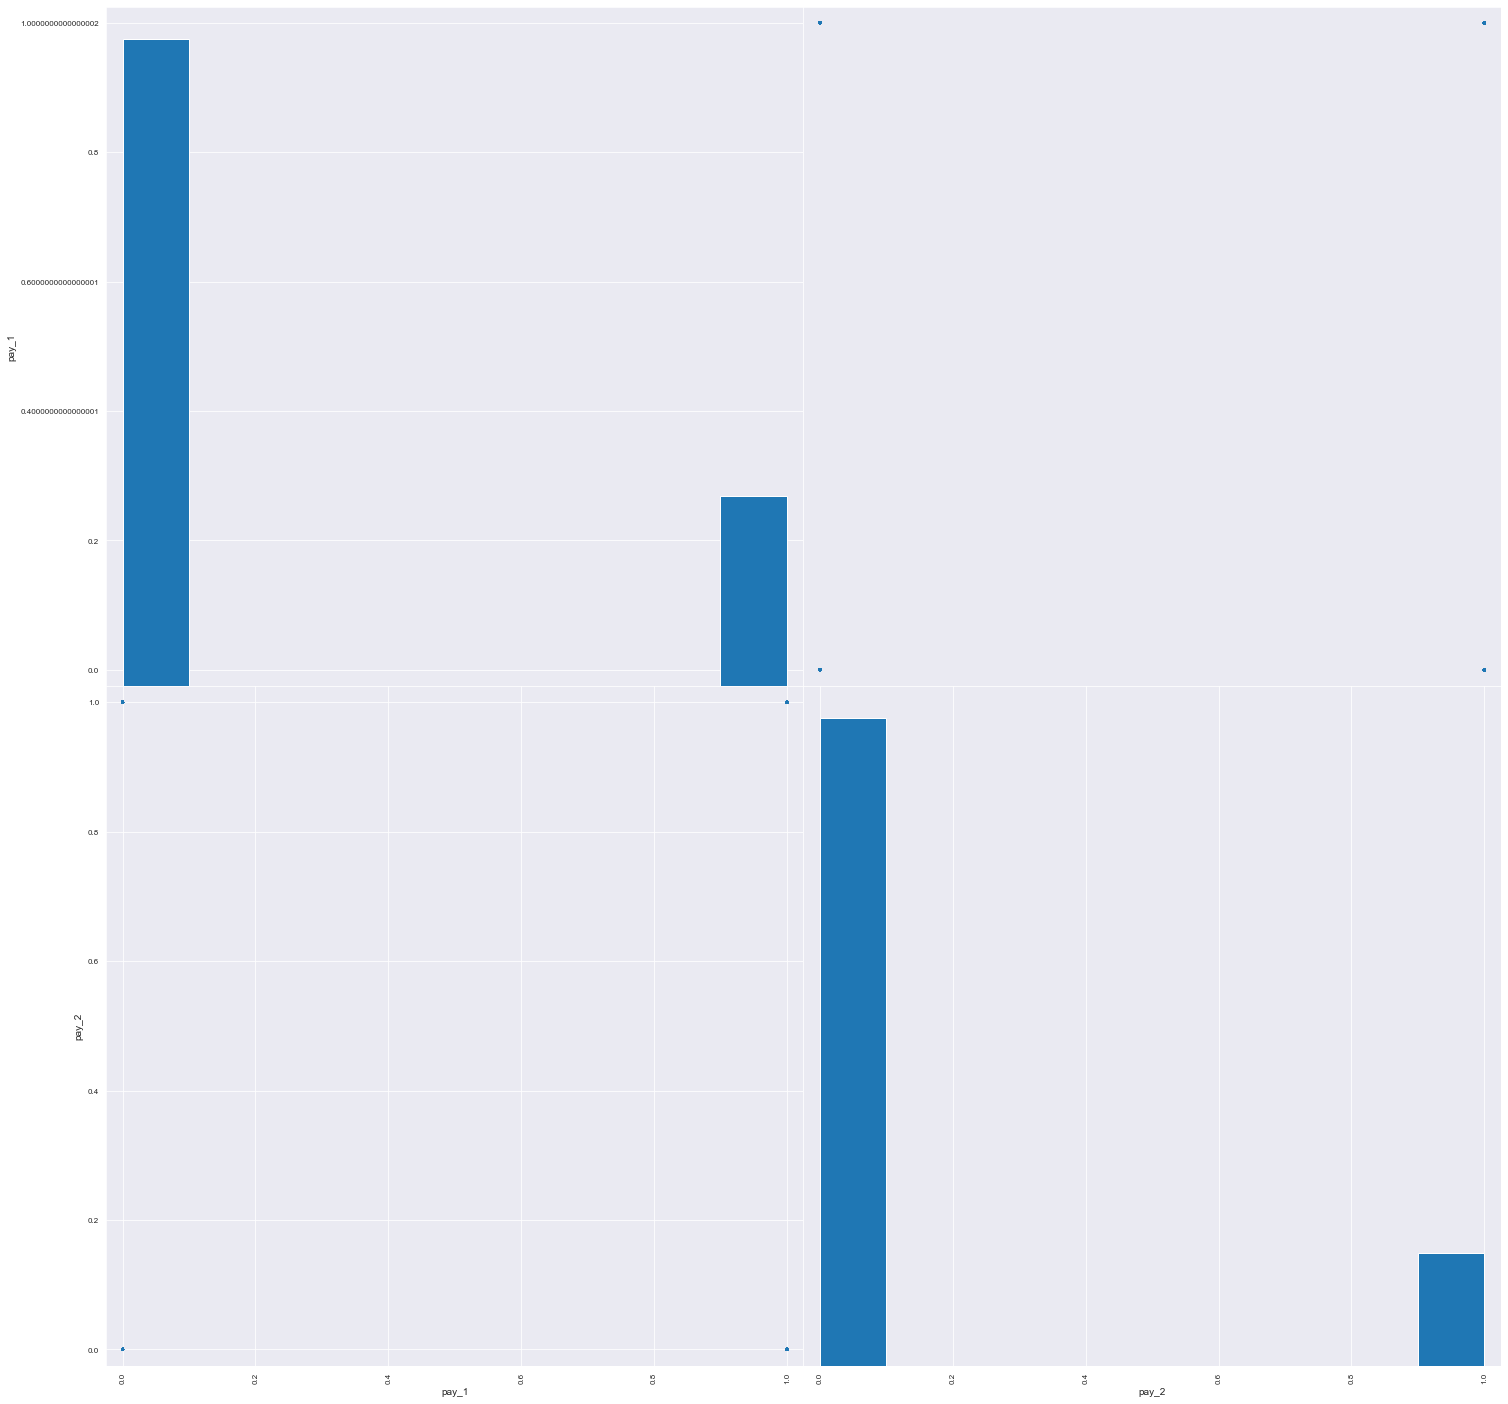

In [106]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['pay_1', 'pay_2']], figsize=(25,25))
plt.show()

### Between a feature and the target

The previous Heatmap also helps us see that the variables that are the most correlated with our target 'default' feature are the 6 previous default variables, with their importance decreasing over time

# Feature engineering

## Let's come back to here later on

Let's first try to get some baseline results, then try to see which improvements our new features add

## Age Binning

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4858658D0>]],
      dtype=object)

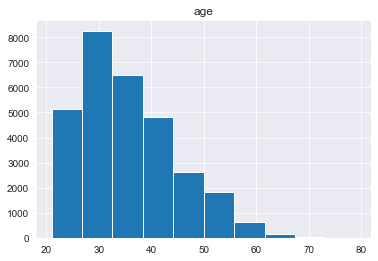

In [32]:
X[['age']].hist()

In [34]:
X[['age']].describe()

age
count  30000.000000
mean      35.485500
std        9.217904
min       21.000000
25%       28.000000
50%       34.000000
75%       41.000000
max       79.000000

In [37]:
bin_names = []
for i in range(2,8):
    bin_names.append(str(i)+'0s')
X['age_bin'] = pd.cut(X['age'], 6, labels=bin_names)

In [38]:
X['age_bin'].value_counts()

20s    11013
30s    10713
40s     6005
50s     1930
60s      314
70s       25
Name: age_bin, dtype: int64

Our last category '70s' is not populated enough, let's merge it with the '60s', so that it doesn't skew the results too much because of a few outliers

In [42]:
X[['age_bin']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
age_bin    30000 non-null category
dtypes: category(1)
memory usage: 29.6 KB


In [45]:
X['age_bin'] = X['age_bin'].cat.add_categories('60+')

In [46]:

X.loc[(X['age_bin']=='60s') | (X['age_bin']=='70s'), 'age_bin'] = '60+'

In [47]:
X['age_bin'].value_counts()

20s    11013
30s    10713
40s     6005
50s     1930
60+      339
70s        0
60s        0
Name: age_bin, dtype: int64

In [48]:
X['age_bin'] = X['age_bin'].cat.remove_unused_categories()

In [49]:
X['age_bin'].value_counts()

20s    11013
30s    10713
40s     6005
50s     1930
60+      339
Name: age_bin, dtype: int64

## Gender x Marriage

## Linear prediction of next month's bill_amt

# Preparing our data

## Defining our (X, y)

In [67]:
X = df.drop(['default'], axis=1)
y = df[['default']]

In [68]:
X.head()

limit_bal  gender  education  marriage  age  pay_1  pay_2  pay_3  pay_4  \
0    20000.0       2          2         1   24      1      1      0      0   
1   120000.0       2          2         2   26      0      1      0      0   
2    90000.0       2          2         2   34      0      0      0      0   
3    50000.0       2          2         1   37      0      0      0      0   
4    50000.0       1          2         1   57      0      0      0      0   

   pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
0      0      0     3913.0     3102.0      689.0        0.0        0.0   
1      0      1     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0  
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0  
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0  
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0  
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0

In [69]:
y.head()

default
0        1
1        1
2        0
3        0
4        0

## One-Hot Encoding our categorical data

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
limit_bal    30000 non-null float64
gender       30000 non-null int64
education    30000 non-null int64
marriage     30000 non-null int64
age          30000 non-null int64
pay_1        30000 non-null int64
pay_2        30000 non-null int64
pay_3        30000 non-null int64
pay_4        30000 non-null int64
pay_5        30000 non-null int64
pay_6        30000 non-null int64
bill_amt1    30000 non-null float64
bill_amt2    30000 non-null float64
bill_amt3    30000 non-null float64
bill_amt4    30000 non-null float64
bill_amt5    30000 non-null float64
bill_amt6    30000 non-null float64
pay_amt1     30000 non-null float64
pay_amt2     30000 non-null float64
pay_amt3     30000 non-null float64
pay_amt4     30000 non-null float64
pay_amt5     30000 non-null float64
pay_amt6     30000 non-null float64
dtypes: float64(13), int64(10)
memory usage: 5.3 MB


In [71]:
X_dummies = pd.get_dummies(X, columns=['gender', 'education', 'marriage'])
X_dummies.head()

limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0    20000.0   24      1      1      0      0      0      0     3913.0   
1   120000.0   26      0      1      0      0      0      1     2682.0   
2    90000.0   34      0      0      0      0      0      0    29239.0   
3    50000.0   37      0      0      0      0      0      0    46990.0   
4    50000.0   57      0      0      0      0      0      0     8617.0   

   bill_amt2  bill_amt3  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  \
0     3102.0      689.0        0.0        0.0        0.0       0.0     689.0   
1     1725.0     2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2    14027.0    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0   
3    48233.0    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0   
4     5670.0    35835.0    20940.0    19146.0    19131.0    2000.0   36681.0   

   pay_amt3  pay_amt4  pay_amt5  pay_amt6  gender_1  gender_2  education_1  \
0       0.0       0.0       0.0       0.0         0         1            0   
1    1000.0    1000.0       0.0    2000.0         0         1            0   
2    1000.0    1000.0    1000.0    5000.0         0         1            0   
3    1200.0    1100.0    1069.0    1000.0         0         1            0   
4   10000.0    9000.0     689.0     679.0         1         0            0   

   education_2  education_3  education_4  marriage_1  marriage_2  marriage_3  
0            1            0            0           1           0           0  
1            1            0            0           0           1           0  
2            1            0            0           0           1           0  
3            1            0            0           1           0           0  
4            1            0            0           1           0           0

In [72]:
colonnes_dummies = list(X_dummies.columns)

## Defining our train/test stratified splits

In [73]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_index, test_index in split.split(df, df['default']):
    X_train, y_train = X_dummies.iloc[train_index, :], y.iloc[train_index, :]
    X_test, y_test = X_dummies.iloc[test_index, :], y.iloc[test_index, :]

In [74]:
for name in ['X_train', 'y_train', 'X_test', 'y_test']:
    print ('{}: {}'.format(name, eval(name).shape))

X_train: (24000, 29)
y_train: (24000, 1)
X_test: (6000, 29)
y_test: (6000, 1)


Let's check that our classes are stratified:

In [75]:
print(np.sum(y_train)/y_train.shape[0])
print(np.sum(y_test)/y_test.shape[0])

default    0.221208
dtype: float64
default    0.221167
dtype: float64


We're good, both our datsets have the same proportion of credit defaults!

## Normalizing our inputs

In [76]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

In [77]:
X_test_norm = scaler.transform(X_test)

# Defining our models

## Logistic regression

### With uncentered data

In [150]:
log_reg = LogisticRegression(C=1, 
                             solver='liblinear',
                             penalty='l2',
                             class_weight='balanced', 
                             random_state=42, 
                             n_jobs=-1)
log_reg.fit(X_train, np.ravel(y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [151]:
y_pred = log_reg.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

accuracy:  0.5576666666666666
recall:  0.6970610399397137
F1:  0.41074600355239793


In [152]:
np.sum(y_pred)

3177

In [153]:
np.sum(y_test)

default    1327
dtype: int64

### With centered data

In [185]:
log_reg = LogisticRegression(C=0.1, 
                             solver='liblinear',
                             penalty='l2',
                             class_weight='balanced', 
                             random_state=42, 
                             n_jobs=-1)
log_reg.fit(X_train_norm, np.ravel(y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
y_pred_train = log_reg.predict(X_train_norm)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = log_reg.predict(X_test_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.7726666666666666
recall:  0.58560934262573
F1:  0.5326366284050027
--TEST--
accuracy:  0.768
recall:  0.5584024114544084
F1:  0.5156576200417536


In [187]:
np.sum(y_pred)

1547

In [188]:
np.sum(y_test)

default    1327
dtype: int64

In [189]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.88      0.83      0.85     18691
     default       0.49      0.59      0.53      5309

    accuracy                           0.77     24000
   macro avg       0.68      0.71      0.69     24000
weighted avg       0.79      0.77      0.78     24000



In [190]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.87      0.83      0.85      4673
     default       0.48      0.56      0.52      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.77      0.77      6000



#### Which are our most important features?

In [191]:
print(log_reg.coef_)

[[-0.23147307  0.04518722  0.5474797   0.07375886  0.14517467  0.11837091
   0.07575203  0.11626623 -0.02714397  0.09930516  0.07307655  0.02879904
  -0.01496643 -0.09541778 -0.14796739 -0.13632126 -0.0142924  -0.01573477
   0.00824116 -0.02722334  0.03541312 -0.03541312  0.01759666  0.02320819
  -0.01457606 -0.11612853  0.0370234  -0.03740819  0.0020565 ]]


In [192]:
coefs=np.array(log_reg.coef_[0])
abs_coefs = np.abs(coefs)

In [193]:
feature_importances_log = pd.DataFrame(list(zip(colonnes_dummies, coefs, abs_coefs)),
                                  columns=['Feature', 'Coef', 'Abs Coef'])

In [194]:
feature_importances_log.sort_values(by=['Abs Coef'], ascending=False)

Feature      Coef  Abs Coef
2         pay_1  0.547480  0.547480
0     limit_bal -0.231473  0.231473
14     pay_amt1 -0.147967  0.147967
4         pay_3  0.145175  0.145175
15     pay_amt2 -0.136321  0.136321
5         pay_4  0.118371  0.118371
7         pay_6  0.116266  0.116266
25  education_4 -0.116129  0.116129
9     bill_amt2  0.099305  0.099305
13    bill_amt6 -0.095418  0.095418
6         pay_5  0.075752  0.075752
3         pay_2  0.073759  0.073759
10    bill_amt3  0.073077  0.073077
1           age  0.045187  0.045187
27   marriage_2 -0.037408  0.037408
26   marriage_1  0.037023  0.037023
20     gender_1  0.035413  0.035413
21     gender_2 -0.035413  0.035413
11    bill_amt4  0.028799  0.028799
19     pay_amt6 -0.027223  0.027223
8     bill_amt1 -0.027144  0.027144
23  education_2  0.023208  0.023208
22  education_1  0.017597  0.017597
17     pay_amt4 -0.015735  0.015735
12    bill_amt5 -0.014966  0.014966
24  education_3 -0.014576  0.014576
16     pay_amt3 -0.014292  0.014292
18     pay_amt5  0.008241  0.008241
28   marriage_3  0.002056  0.002056

Hence, it appears that our most important variables seem to be:

In [195]:
list(feature_importances_log.sort_values(by=['Abs Coef'], ascending=False)['Feature'])[:9]

['pay_1',
 'limit_bal',
 'pay_amt1',
 'pay_3',
 'pay_amt2',
 'pay_4',
 'pay_6',
 'education_4',
 'bill_amt2']

It is weird that pay_3, pay_4, pay_6 all seem to be more important than pay_2 feature, while it is more recent...  
Maybe it is because pay_2 is already kind of taken into account in pay_1?

## SVM

from sklearn.svm import SVC

svc_clf = SVC(gamma='auto')
params = {'C': [0.01, 0.1, 1, 10, 100]}
svc_clf_gs = GridSearchCV(svc_clf, params, cv=2)
svc_clf_gs.fit(X_train_norm, np.ravel(y_train))


In [109]:
svc_clf_gs.best_params_

{'C': 1}

In [110]:
y_pred_train = svc_clf_gs.predict(X_train_norm)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = svc_clf_gs.predict(X_test_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TEST--
accuracy:  0.7787916666666667
recall:  0.0
F1:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


--TEST--
accuracy:  0.7788333333333334
recall:  0.0
F1:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [112]:
svc_clf = SVC(gamma='auto', C=1, class_weight='balanced')
svc_clf.fit(X_train_norm, np.ravel(y_train))

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [129]:
y_pred_train = svc_clf.predict(X_train_norm)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = svc_clf.predict(X_test_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.7688333333333334
recall:  0.6423055189301187
F1:  0.5514230271668822
--TEST--
accuracy:  0.7525
recall:  0.5787490580256217
F1:  0.5084409136047666


In [123]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.83      0.95      0.89      4673
     default       0.64      0.31      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import ComplementNB

nb_clf = ComplementNB()
nb_clf.fit(X_train, np.ravel(y_train))

## KNN: Bad for our unbalanced classes !

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_norm, np.ravel(y_train))

y_pred_train = knn_clf.predict(X_train)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = knn_clf.predict(X_test)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Well, these results are quite underwhelming :/

Let's see if we can find some better value of K using grid-search

y_pred

params = {'n_neighbors': range(1,11)}
knn_clf = KNeighborsClassifier()
knn_clf_gs = GridSearchCV(knn_clf, params, cv=3)

knn_clf_gs.fit(X_train_norm, np.ravel(y_train))

knn_clf_gs.best_params_

y_pred_train = knn_clf_gs.predict(X_train)

print('--TEST--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = knn_clf_gs.predict(X_test)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

**DAMMIT, WTF**

## Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42, 
                                 max_leaf_nodes=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [132]:
y_pred_train = tree_clf.predict(X_train)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = tree_clf.predict(X_test)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.8085
recall:  0.4401958937653042
F1:  0.5042071197411003
--TEST--
accuracy:  0.8028333333333333
recall:  0.4242652599849284
F1:  0.4876569943698571


In [134]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.85      0.91      0.88     18691
     default       0.59      0.44      0.50      5309

    accuracy                           0.81     24000
   macro avg       0.72      0.68      0.69     24000
weighted avg       0.79      0.81      0.80     24000



In [133]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.85      0.91      0.88      4673
     default       0.57      0.42      0.49      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.67      0.68      6000
weighted avg       0.79      0.80      0.79      6000



Let's visualize our Decision Tree

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file='tree_credit_default.dot',
                feature_names=list(X_train.columns),
                class_names=['no-default', 'default'],
                rounded=True,
                filled=True
               )

![Decision Tree Visualization](DecisionTreeViz-CreditDefault.png)

In [ ]:
feature_importance_tree = pd.DataFrame(list(zip(X_train.columns, tree_clf.feature_importances_)), 
                   columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)

Hence, it appears that our most important variables seem to be:

In [240]:
list(feature_importance_tree.sort_values(by=['Importance'], ascending=False)['Feature'])[:9]

['pay_1',
 'bill_amt1',
 'pay_amt2',
 'pay_4',
 'pay_amt1',
 'pay_2',
 'pay_3',
 'pay_5',
 'pay_6',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'age',
 'pay_amt3',
 'pay_amt6',
 'pay_amt5',
 'gender_1',
 'gender_2',
 'education_1',
 'education_2',
 'education_3',
 'education_4',
 'marriage_1',
 'marriage_2',
 'pay_amt4',
 'limit_bal',
 'marriage_3']

L'importance des features proposée par notre arbre de décision a l'air plus pertinente que celle proposée par notre Régression Logistique, puisque il met plus l'accent sur les variables du mois précédent:
* pay_1: Repayment status in September, 2005 (0=pay duly, 1=payment delay)
* bill_amt1: Amount of bill statement in September, 2005 (NT dollar)
* pay_amt1: Amount of previous payment in September, 2005 (NT dollar)

## Boostings models

### AdaBoost

In [118]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train_norm, np.ravel(y_train))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [120]:
y_pred_train = ada_clf.predict(X_train_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = ada_clf.predict(X_test_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TEST--
accuracy:  0.8090833333333334
recall:  0.31606705594273876
F1:  0.42277651801461325
--TEST--
accuracy:  0.8086666666666666
recall:  0.31499623210248684
F1:  0.4213709677419355


In [122]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.83      0.95      0.89      4673
     default       0.64      0.31      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



### XGBoost

### LightGBM

### CatBoost

# Training our models